In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns
#from statsmodels.graphics.mosaicplot import mosaic
import io
import requests

%matplotlib inline

# Análisis exploratorio

## Lectura de datos del CSV y seteo del tipo para cada columna

In [15]:
url="https://raw.githubusercontent.com/joacols/TP_orga_de_datos/main/Entrenamieto_ECI_2020.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),

#df = pd.read_csv('Entrenamieto_ECI_2020.csv',
dtype={
'ID': np.int64,
'Pricing, Delivery_Terms_Quote_Approval': np.int64,
'Pricing, Delivery_Terms_Approved': np.int64,
'Bureaucratic_Code_0_Approval': np.int64,
'Bureaucratic_Code_0_Approved': np.int64,
'Submitted_for_Approval': np.int64,
'Opportunity_ID': np.int64,
#'Sales_Contract_No': np.int64,
'Delivery_Year': np.int64,
'Total_Power': np.int64,
#'Price':np.float64,
'ASP':np.float64,
'ASP_(converted)':np.float64,
'Total_Amount':np.float64},
parse_dates=[
'Account_Created_Date',
'Planned_Delivery_Start_Date',
'Planned_Delivery_End_Date',
'Opportunity_Created_Date',
'Last_Activity',
'Quote_Expiry_Date',
'Actual_Delivery_Date',
'Last_Modified_Date'
])

df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [ ]:
#df[df['Last_Activity']!='NaT']

In [ ]:
df['Price'].head()

0    None
1    None
2    None
3    0.42
4    0.42
Name: Price, dtype: object

In [ ]:
df['Sales_Contract_No'].head()


0    None
1      39
2     760
3    None
4    None
Name: Sales_Contract_No, dtype: object

In [ ]:
df['Price'].replace('None',np.NaN,inplace=True)
df['Price'].replace('Other',np.NaN,inplace=True)

#df.loc[df['Price'] =='None'] = np.NaN
df['Price'].head()

0     NaN
1     NaN
2     NaN
3    0.42
4    0.42
Name: Price, dtype: object

In [ ]:
df['Sales_Contract_No'].replace('None',np.NaN,inplace=True)
df['Sales_Contract_No'].replace('Other',np.NaN,inplace=True)
df['Sales_Contract_No'].head()

0    NaN
1     39
2    760
3    NaN
4    NaN
Name: Sales_Contract_No, dtype: object

In [ ]:
df = df.astype({"Price": np.float64, "Sales_Contract_No": np.float64})

In [ ]:
df[['Month','Delivery_Year']].head()

,Month,Delivery_Year
0,2016 - 5,2016
1,2016 - 1,2016
2,2016 - 1,2016
3,2018 - 2,2018
4,2018 - 2,2018


In [ ]:
df['Month'].head()

0    2016 - 5
1    2016 - 1
2    2016 - 1
3    2018 - 2
4    2018 - 2
Name: Month, dtype: object

In [ ]:
df["Delivery_Month"] = df['Month'].map(lambda x: x.split('-')[1])
df = df.astype({"Delivery_Month": np.int8})

df["Delivery_Month"].head()

0    5
1    1
2    1
3    2
4    2
Name: Delivery_Month, dtype: int8

In [ ]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Delivery_Month
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,5
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,2
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,2


In [ ]:
df['Submitted_for_Approval'].head()

0    0
1    0
2    0
3    0
4    0
Name: Submitted_for_Approval, dtype: int64

## Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

## Análisis inicial

In [4]:
print("Análisis inicial:")
print(f"\nCantidad de filas: {df.shape[0]}")
print(f"\nCantidad de columnas: {df.shape[1]}")
print(f"\nCantidad de celdas con potencial informacion: {df.size}")
print("\nContenido de las primeras filas:")
df.head()

Análisis inicial:

Cantidad de filas: 16947

Cantidad de columnas: 52

Cantidad de celdas con potencial informacion: 881244

Contenido de las primeras filas:


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


## Análisis de datos faltantes

In [ ]:
faltantes=pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['nulls'])
filas=len(df)
faltantes['porcentaje']=round(100*faltantes['nulls']/filas,2)
faltantes[faltantes['nulls']!=0]
#faltantes

,nulls,porcentaje
Actual_Delivery_Date,16947,100.00
Last_Activity,16947,100.00
Price,16591,97.90
Sales_Contract_No,6973,41.15
Quote_Expiry_Date,4625,27.29
ASP_(converted),3209,18.94
ASP,3209,18.94
Planned_Delivery_End_Date,75,0.44
Total_Amount,59,0.35


Las columnas 'Actual_Delivery_Date', 'Last_Activity' y 'Price' tienen entre un 100% y un 98% de datos faltantes, motivo por el cual se sacarán del dataframe

In [17]:
df2=df.drop(['Actual_Delivery_Date', 'Last_Activity', 'Price'], axis=1)
df2.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,USD,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,USD,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


## Exploro para ciertas columnas cuantos valores hay de cada tipo

In [ ]:
df2['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [ ]:
df2['Territory'].value_counts()

None                    4999
Germany                 1682
NW America              1568
Australia               1208
India                    809
NE America               760
Japan                    681
Netherlands              533
SE America               493
France                   449
Singapore                441
United Kingdom           313
Belgium                  285
Italy                    283
Spain                    268
Central US               254
China (PRC)              218
SW America               206
Thailand                 173
Indonesia                154
Austria                  145
Philippines              109
Jordan                   102
Canada                    74
Luxembourg                70
Portugal                  66
Poland                    60
Vietnam                   51
Cyprus                    44
New Zealand               38
                        ... 
Kazakhstan                 7
Macedonia                  6
Saudi Arabia               6
Malta         

In [ ]:
df2['Source '].value_counts()

None         9497
Source_7     2965
Source_9     1459
Source_11    1421
Source_13     786
Source_3      418
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source , dtype: int64

In [ ]:
df2['Billing_Country'].value_counts()

Japan                                         4879
United States                                 3802
Germany                                       1979
Australia                                     1169
India                                          672
Netherlands                                    563
Singapore                                      432
France                                         396
Spain                                          317
Italy                                          295
United Kingdom                                 284
Belgium                                        226
China                                          222
Thailand                                       195
Austria                                        145
Indonesia                                      142
Philippines                                    138
Luxembourg                                     136
Canada                                         120
Jordan                         

In [ ]:
df2['Quote_Type'].value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

In [ ]:
df2['Currency'].value_counts()

None    16052
EUR       475
USD       420
Name: Currency, dtype: int64

In [ ]:
df2['ASP_Currency'].value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: ASP_Currency, dtype: int64

In [ ]:
df2['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [ ]:
df2['Delivery_Quarter'].value_counts()

Q2    4443
Q1    4317
Q4    4144
Q3    4043
Name: Delivery_Quarter, dtype: int64

In [ ]:
df2['Total_Taxable_Amount_Currency'].value_counts()

USD    7347
JPY    4525
EUR    4518
AUD     553
GBP       4
Name: Total_Taxable_Amount_Currency, dtype: int64

In [ ]:
df2['Delivery_Year'].value_counts()

2017    6318
2018    5830
2016    4371
2019     414
2020      14
Name: Delivery_Year, dtype: int64

In [ ]:
df2['ASP_(converted)'].value_counts()

0.38000    570
0.40000    497
0.36000    326
0.39000    325
0.00000    300
          ... 
0.32365      1
0.67868      1
0.43820      1
0.47300      1
0.30567      1
Name: ASP_(converted), Length: 441, dtype: int64

In [ ]:
#df2['TRF'].value_counts()

## Análisis de precio promedio de venta (en USD) por región

In [ ]:
df2[['Region','Delivery_Year','ASP_(converted)','ASP_(converted)_Currency']].head()

,Region,Delivery_Year,ASP_(converted),ASP_(converted)_Currency
0,EMEA,2016,0.58817,USD
1,EMEA,2016,0.59948,USD
2,Americas,2016,0.48000,USD
3,Americas,2018,0.53000,USD
4,Americas,2018,0.53000,USD


In [23]:
df2Region=df2.groupby('Region')
df2Region['Stage'].max()

Region
APAC           Qualification
Americas            Proposal
EMEA                Proposal
Japan          Qualification
Middle East         Proposal
Name: Stage, dtype: object

In [ ]:
precioVentaAnualPorRegion=df2.groupby(['Region','Delivery_Year']).agg({'ASP_(converted)': 'mean'}).sort_values('ASP_(converted)', ascending=False)
precioVentaAnualPorRegion

ASP_(converted)
Region      Delivery_Year                 
Japan       2016                  0.615010
EMEA        2016                  0.605675
Americas    2016                  0.576835
            2018                  0.457564
APAC        2016                  0.451346
EMEA        2017                  0.431987
Middle East 2016                  0.423231
Japan       2017                  0.418712
Americas    2017                  0.397889
Japan       2018                  0.393486
Americas    2019                  0.393256
Japan       2019                  0.378218
EMEA        2018                  0.370901
Middle East 2017                  0.358714
APAC        2017                  0.357214
            2018                  0.353794
Middle East 2018                  0.343846
Japan       2020                  0.336584
APAC        2019                  0.324960
            2020                  0.315000
EMEA        2019                  0.313476
Middle East 2019                  0.299375
Americas    2020                  0.295000

In [ ]:
dato1=precioVentaAnualPorRegion.pivot_table(index='Region',columns='Delivery_Year',values='ASP_(converted)')
#dato1=dato.rename(index={'APAC': 'Asia Pacific (APAC)', 'EMEA': 'Europe Middle East Africa (EMEA)'})
dato1

Delivery_Year,2016,2017,2018,2019,2020
Region,,,,,
APAC,0.451346,0.357214,0.353794,0.324960,0.315000
Americas,0.576835,0.397889,0.457564,0.393256,0.295000
EMEA,0.605675,0.431987,0.370901,0.313476,NaN
Japan,0.615010,0.418712,0.393486,0.378218,0.336584
Middle East,0.423231,0.358714,0.343846,0.299375,NaN


Text(0, 0.5, 'Regiones')

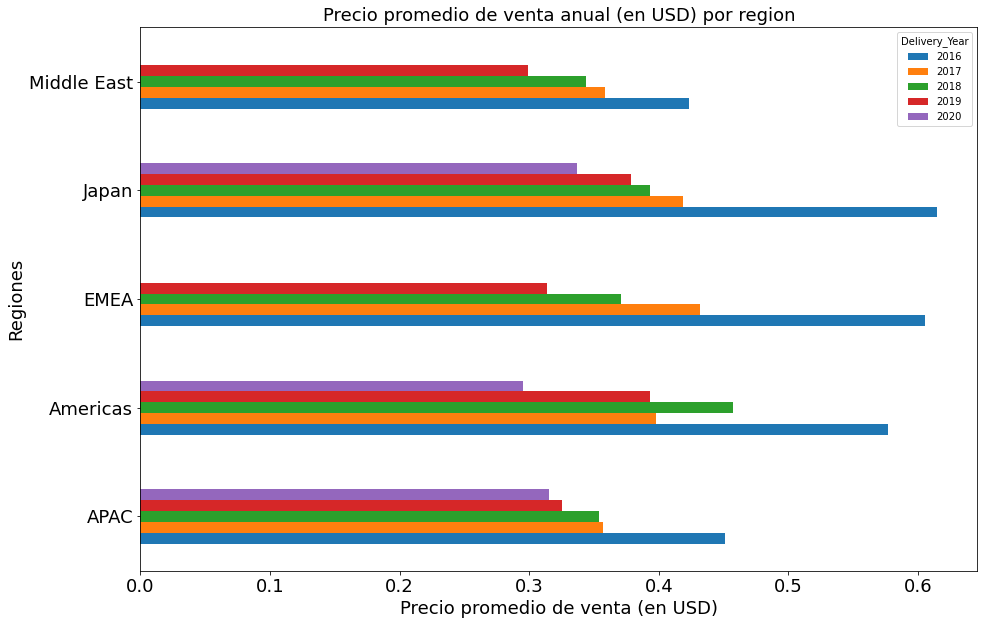

In [ ]:
datos=dato1
titulo='Precio promedio de venta anual (en USD) por region'
etiqueta_x='Precio promedio de venta (en USD)'
etiqueta_y='Regiones'
tamanio=(15,10)
plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
plot.set_title(titulo,fontSize=18)
plot.set_xlabel(etiqueta_x,fontSize=18)
plot.set_ylabel(etiqueta_y,fontSize=18)

#### Siglas:
* __EMEA:Europe Middle East Africa__
* __APAC:Asia Pacific__

Del análisis del gráfico se puede observar que:
* En las 5 regiones el precio promedio de venta disminuye año a año, con la salvedad de que en la región 'Americas', en el año 2018 hay un aumento para luego volver a caer en el año 2019
* 'Japan' es la región con más valor de precio promedio de venta del 2016 a 2020, salvo en el año 2018 en el que es superado por la región 'Americas'
* En las 5 regiones se da la situación de que el precio promedio de venta es mucho mayor en el año 2016 respecto de los años siguientes. Entre los años 2017 y 2020 las diferencias entre precios promedio de venta son mucho menores

## Análisis de Toneladas De Refrigeración por región

In [ ]:
df2[['Region','TRF']].groupby("Region").sum().head()

,TRF
Region,
APAC,10732
Americas,16258
EMEA,10840
Japan,953
Middle East,842


In [ ]:
TRFAnualPorRegion=df2.groupby(['Region','Delivery_Year']).agg({'TRF': 'mean'}).sort_values('TRF', ascending=False)
TRFAnualPorRegion

TRF
Region      Delivery_Year           
APAC        2019           20.653465
Americas    2019           14.931034
            2016            7.851124
Japan       2020            7.090909
EMEA        2019            6.938776
Middle East 2017            6.610390
Americas    2020            4.000000
Middle East 2018            3.756410
APAC        2018            3.596557
Americas    2017            3.334986
EMEA        2017            2.832571
Americas    2018            2.478286
APAC        2017            2.461901
EMEA        2016            2.268672
Middle East 2016            1.769231
Japan       2019            1.698795
EMEA        2018            1.628510
APAC        2016            1.281818
Middle East 2019            1.062500
APAC        2020            1.000000
Japan       2018            0.424419
            2017            0.126800
            2016            0.065666

In [ ]:
dato2=TRFAnualPorRegion.pivot_table(index='Region',columns='Delivery_Year',values='TRF')
dato2

Delivery_Year,2016,2017,2018,2019,2020
Region,,,,,
APAC,1.281818,2.461901,3.596557,20.653465,1.000000
Americas,7.851124,3.334986,2.478286,14.931034,4.000000
EMEA,2.268672,2.832571,1.628510,6.938776,NaN
Japan,0.065666,0.126800,0.424419,1.698795,7.090909
Middle East,1.769231,6.610390,3.756410,1.062500,NaN


Text(0, 0.5, 'Regiones')

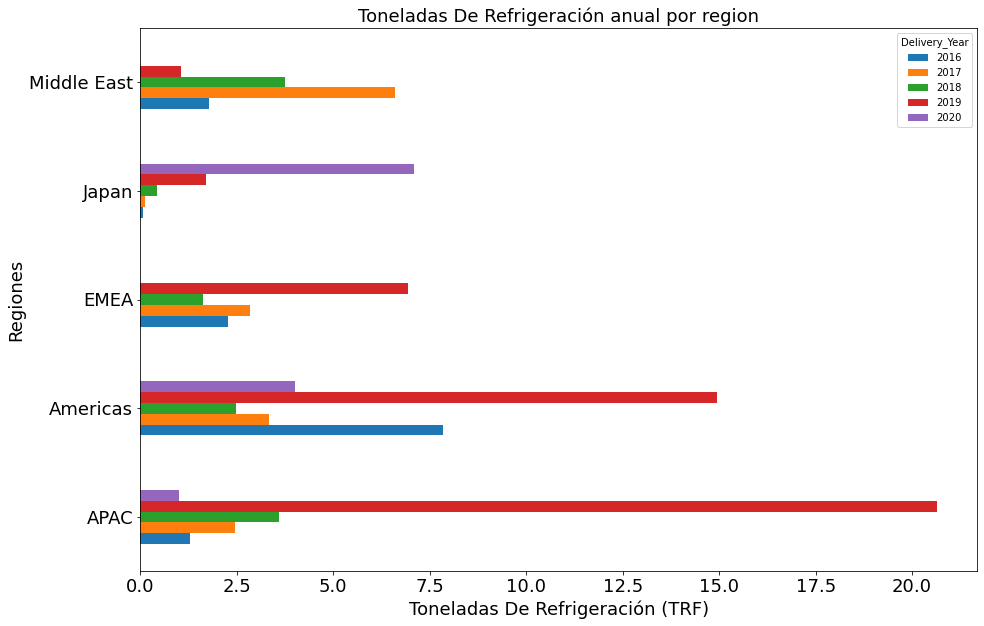

In [ ]:
datos=dato2
titulo='Toneladas De Refrigeración anual por region'
etiqueta_x='Toneladas De Refrigeración (TRF)'
etiqueta_y='Regiones'
tamanio=(15,10)
plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
plot.set_title(titulo,fontSize=18)
plot.set_xlabel(etiqueta_x,fontSize=18)
plot.set_ylabel(etiqueta_y,fontSize=18)

#### Siglas:
* __EMEA:Europe Middle East Africa__
* __APAC:Asia Pacific__

Del análisis del gráfico se puede observar que:
* En la región 'APAC' año a año van aumentando las TRF, ocurriendo un aumento muy grande en 2019, pero luego ocurre una caída muy grande en el año 2020 (llegando a los niveles más bajos para esa región)
* En la región 'Japan' año a año van aumentando las TRF, ocurriendo un aumento muy grande en 2020
* En la región 'EMEA' hay un aumento de las TRF del año 2016 al 2017, luego disminuye a el nivel más bajo para esta región en el año 2018, para finalmente alcanzar un gran aumento en el año 2019 (que representa el nivel más alto para esa región)
* En la región 'Americas' se observa una caida grande de las TRF del año 2016 al año 2017,continuando con una caída menor en el 2018 (que representa el nivel más bajo para esa región), luego se produce un gran aumento en el 2019 (siendo este el nivel más alto para la región) y finalmente en el año 2020 alcanza valores similares al año 2017
* En la región 'Middle East' se observa como aumentan las TRF hasta llegar al máximo para esa región en el 2017, en el 2018 se observa una disminución que continúa en el 2019 (año en el cual se llega al mínimo para esa región)

## Análisis porcentaje de entregas planificadas trimestrales por región de por región

In [ ]:
df2['Delivery_Quarter'].value_counts()

Q2    4443
Q1    4317
Q4    4144
Q3    4043
Name: Delivery_Quarter, dtype: int64

In [ ]:
df2['Cantidad']=1
df2[['Region','Delivery_Quarter','Cantidad']].head()

,Region,Delivery_Quarter,Cantidad
0,EMEA,Q2,1
1,EMEA,Q1,1
2,Americas,Q1,1
3,Americas,Q1,1
4,Americas,Q1,1


In [ ]:
grouped=df2.groupby(['Region','Delivery_Quarter']).agg({'Cantidad': 'sum'})#.sort_values('Cantidad', ascending=False)
grouped

Cantidad
Region      Delivery_Quarter          
APAC        Q1                     767
            Q2                     846
            Q3                     799
            Q4                     850
Americas    Q1                     859
            Q2                     971
            Q3                    1067
            Q4                    1048
EMEA        Q1                    1073
            Q2                    1311
            Q3                    1179
            Q4                    1101
Japan       Q1                    1573
            Q2                    1281
            Q3                     930
            Q4                    1108
Middle East Q1                      45
            Q2                      34
            Q3                      68
            Q4                      37

In [ ]:
pivoted=grouped.pivot_table(index='Region',columns='Delivery_Quarter',values='Cantidad')
pivoted

Delivery_Quarter,Q1,Q2,Q3,Q4
Region,,,,
APAC,767,846,799,850
Americas,859,971,1067,1048
EMEA,1073,1311,1179,1101
Japan,1573,1281,930,1108
Middle East,45,34,68,37


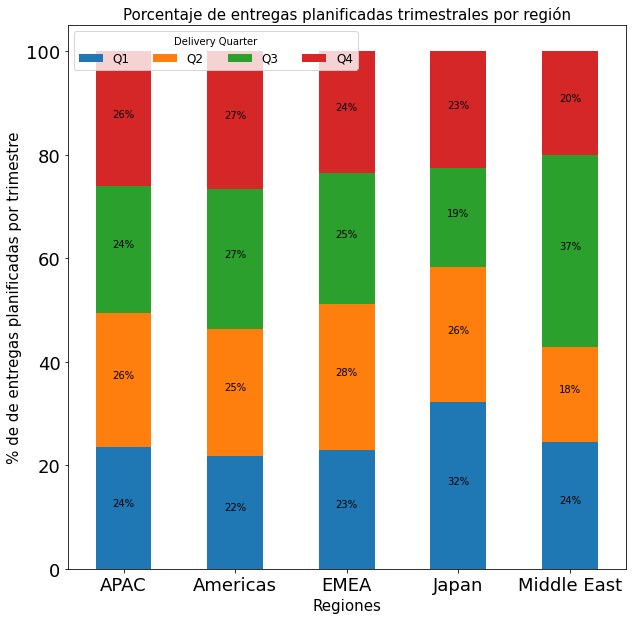

In [ ]:
data = pivoted.apply(lambda r: r/r.sum()*100, axis=1)
ax=data.plot.bar(figsize=(10,10),stacked=True, rot=0,fontsize=18)
#display(data)

#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Del. Quarter")
ax.legend(ncol=len(df2.Delivery_Quarter), bbox_to_anchor=(0, 1),
              loc='upper left', fontsize=12,title="Delivery Quarter")

for rec in ax.patches:
    alto = rec.get_height()
    posx_centrada=rec.get_x() + rec.get_width() / 2
    posy_centrada=rec.get_y() + alto / 2
    ax.text(posx_centrada, 
              posy_centrada,
              "{:.0f}%".format(alto),
              ha='center', 
              va='bottom')

plt.title('Porcentaje de entregas planificadas trimestrales por región',fontSize=15)
plt.xlabel('Regiones',fontSize=15)
plt.ylabel('% de de entregas planificadas por trimestre',fontSize=15)
plt.show()

#### Siglas:
* __EMEA:Europe Middle East Africa__
* __APAC:Asia Pacific__

### Del análisis del gráfico se puede observar que:
* Para la región de 'APAC' un 24% de las entregas planificadas corresponden el primer trimestre, un 26% al segundo,un 24% al tercero y un 26% al cuarto 
* Para la región de 'Americas' un 22% de las entregas planificadas corresponden el primer trimestre, un 25% al segundo,un 27% al tercero y un 27% al cuarto 
* Para la región de 'EMEA' un 23% de las entregas planificadas corresponden el primer trimestre, un 28% al segundo,un 25% al tercero y un 24% al cuarto 
* Para la región de 'Japan' un 32% de las entregas planificadas corresponden el primer trimestre, un 26% al segundo,un 19% al tercero y un 23% al cuarto 
* Para la región de 'Middle East' un 24% de las entregas planificadas corresponden el primer trimestre, un 18% al segundo,un 37% al tercero y un 20% al cuarto 

## Análisis de correlación de los datos sin tener en cuenta numeros identificatorios

Dos variables se correlacionan positivamente si cuando una variable aumenta, la otra tiende a aumentar

Text(0.5, 1.0, 'Análsis de correlación los datos numéricos')

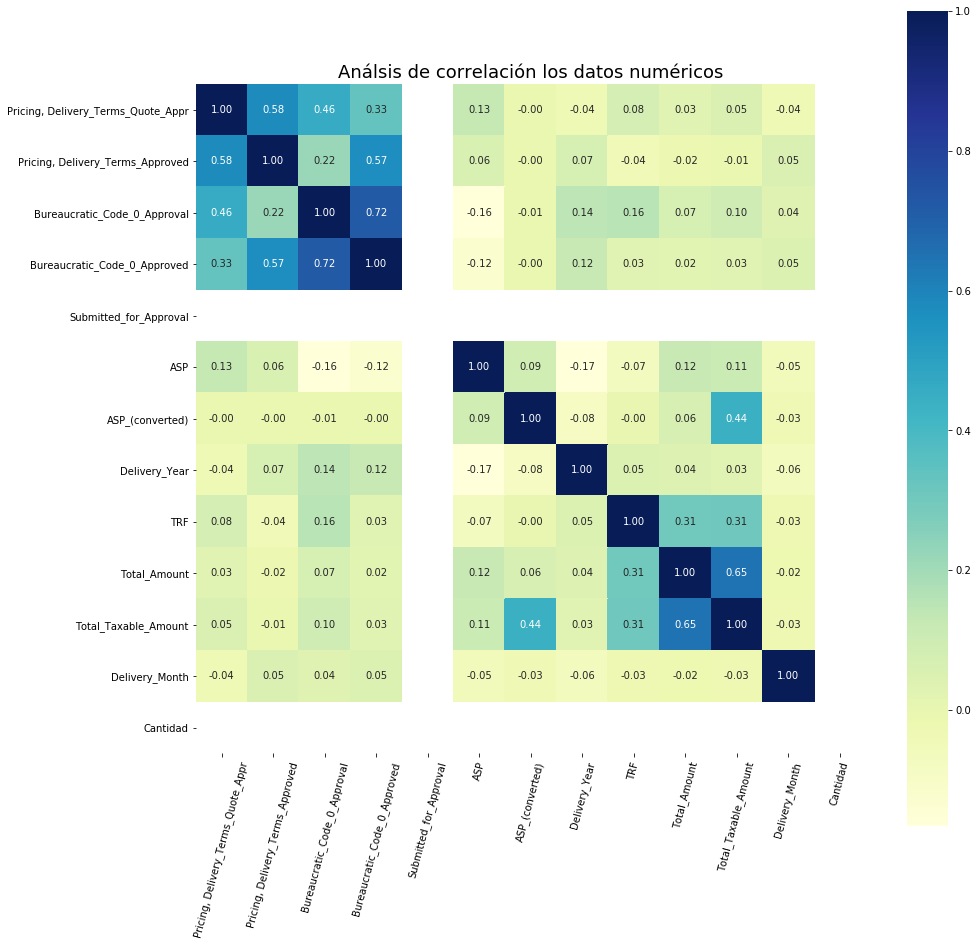

In [ ]:
df3=df2.drop(['ID', 'Opportunity_ID', 'Sales_Contract_No'], axis=1)

plt.figure(figsize=(15, 15))
titulo='Análsis de correlación los datos numéricos'

sns.heatmap(df3.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


A continuación se muestra un cuadro con los cuatro pares de variables con mayor correlación positiva y su análisis:

|Variable 1 | Variable 2 |Correlacion |Análisis |
|:-|:-|:-|:-|
|Bureaucratic_Code_0_Approval|Bureaucratic_Code_0_Approved|0.72|Esta correlación esta indicando que una alta cantidad de oportunidades que necesitan el código burocrático 0 lo suelen obtener|
|Total_Amount|Total_Taxable_Amount|0.65|Estas variables están bastante correlacionadas probablemente porque una representa el monto total y la otra el monto total más impuestos|
|Pricing, Delivery_Terms_Quote_Approval|Pricing, Delivery_Terms_Approved|0.58|Esta correlación esta indicando que las oportunidades que necesitan aprobación especial la suelen obtener|
|Bureaucratic_Code_0_Approved|Pricing, Delivery_Terms_Approved|0.57|Esta correlación indica que las oportunidades que obtienen código burocrático 0 suelen obtener la aprobación especial|

# ----------------------------------------------------------------------------------------------------------

***Veo si existe relacion entre antiguedad de la cuenta antes del inicio del tramite y los casos positivos. 

In [ ]:
df2[["Account_Name", "Account_Created_Date", ]].groupby("Account_Name")

## Analisis de efectividad de las operaciones por año


In [ ]:
df['Stage'].value_counts(normalize=True)


Closed Won       0.562518
Closed Lost      0.433705
Proposal         0.002065
Negotiation      0.001062
Qualification    0.000649
Name: Stage, dtype: float64

In [ ]:
En general en el total de los datos la cantidad de operaciones exitosas es levemente superior a la cantidad de operaciones fallidas.

In [ ]:
Ahora agrupamos las operaciones por año.

In [ ]:
df.groupby(['Delivery_Year'])['Stage'].value_counts(normalize=True)

Delivery_Year  Stage        
2016           Closed Lost      0.511096
               Closed Won       0.488904
2017           Closed Won       0.648148
               Closed Lost      0.351694
               Proposal         0.000158
2018           Closed Won       0.548199
               Closed Lost      0.451801
2019           Closed Lost      0.628019
               Closed Won       0.253623
               Proposal         0.055556
               Negotiation      0.043478
               Qualification    0.019324
2020           Proposal         0.785714
               Qualification    0.214286
Name: Stage, dtype: float64

Vemos que para el año 2017 la cantidad de operaciones exitosas (Closed Won) duplico la cantidad de operaciones fallidas(Closed Lost)

Tambien podemos ver que para el año 2019 la cantidad de operaciones fallidas fue casi tres veces mas que la cantidad de operaciones exitosas.

## Analisis de efectividad de las operaciones por antiguedad de la cuenta del cliente

In [ ]:
df['Anio_antiguead_cuenta']= pd.DatetimeIndex(df['Account_Created_Date']).year  


In [ ]:
df.groupby(['Anio_antiguead_cuenta'])['Stage'].value_counts(normalize=True)

Anio_antiguead_cuenta  Stage        
2013                   Closed Won       0.702857
                       Closed Lost      0.296703
                       Negotiation      0.000220
                       Proposal         0.000220
2014                   Closed Lost      0.509051
                       Closed Won       0.490949
2015                   Closed Won       0.569312
                       Closed Lost      0.429876
                       Qualification    0.000609
                       Proposal         0.000203
2016                   Closed Won       0.515249
                       Closed Lost      0.480578
                       Proposal         0.002247
                       Qualification    0.001284
                       Negotiation      0.000642
2017                   Closed Lost      0.560181
                       Closed Won       0.433937
                       Negotiation      0.003620
                       Proposal         0.001357
                       Qualifica

Vemos que en general la proporcion de operaciones exitosas y fallidas es del 50 porciento, salvo para el año 2013 (los clientes mas antiguos) donde el porcentaje de operaciones exitosas es mas del doble que las operaciones fallidas.
Tambien podemos ver que para los clientes mas nuevos (2018) el porcentaje de operaciones fallidas (58%) es bastante superior a las operaciones exitosas (37%)